In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [51]:
df = pd.read_json('../data/data.json')

In [52]:
df_shape = df.shape
print(f'Rows and columns in one JSON file is {df_shape}')

Rows and columns in one JSON file is (121, 6)


In [53]:
df_rows = df.head(10)
print(f'First 10 columns in one JSON file is {df_rows}')

First 10 columns in one JSON file is                    name artist  year gender  likes  bought
0                 Queen  Queen  1973   Rock  560.0   False
1              Queen II  Queen  1974   Rock  480.0   False
2    Sheer Heart Attack  Queen  1974   Rock  487.0   False
3  A Night at the Opera  Queen  1975   Rock  565.0   False
4     News of the World  Queen  1977   Rock  562.0   False
5                  Jazz  Queen  1978   Rock  568.0   False
6              The Game  Queen  1980   Rock  492.0   False
7             Hot Space  Queen  1982   Rock  482.0   False
8             The Works  Queen  1984   Rock  552.0   False
9       A Kind of Magic  Queen  1986   Rock  542.0   False


In [54]:
print(f'The column names are :')
print('#########')
for col in df.columns:
    print(col)

The column names are :
#########
name
artist
year
gender
likes
bought


In [55]:
cols = df.filter(regex='nam').columns

print(cols)

Index(['name'], dtype='object')


In [56]:
print("The #rows and #columns are ", df.shape[0] , " and ", df.shape[1])
print("The years in this dataset are: ", df.year.unique())
print("The artists covered in this dataset are: ", list(df.artist.unique()))
print("The genders covered are: ", list(df.gender.unique()))

The #rows and #columns are  121  and  6
The years in this dataset are:  [1973 1974 1975 1977 1978 1980 1982 1984 1986 1989 1991 1995 1993 1963
 1964 1965 1966 1967 1968 1970 1976 1979 1981 2021 2012 2015 2017 2018
 1999 2001 2003 2006 2009 2022 1969 1971 1972 1983 1987 1997 2002 2013
 2016 1996 2000 2010 2014 2004 2005]
The artists covered in this dataset are:  ['Queen', 'Nirvana', 'The Beatles', 'ABBA', 'Imagine Dragons', 'MUSE', 'Rosalía', 'David Bowie', 'Spice Girls', 'Michael Jackson', 'Archive', 'Daft Punk']
The genders covered are:  ['Rock', 'Pop', 'Pop Rock', 'Alternative Rock', 'Flamenco', 'Electronic']


In [57]:
counts = pd.DataFrame({'Count':df.gender.value_counts()})
counts

,Count
gender,
Rock,64
Pop,25
Electronic,16
Alternative Rock,9
Pop Rock,4
Flamenco,3


In [58]:
counts.sort_values(by=['gender'],ascending=True).head(15)

,Count
gender,
Alternative Rock,9
Electronic,16
Flamenco,3
Pop,25
Pop Rock,4
Rock,64


In [59]:
df.rename(columns={'bought':'is_bought'}, inplace=True)

In [60]:
df.isnull().sum(axis=0)

name         0
artist       0
year         0
gender       0
likes        1
is_bought    0
dtype: int64

In [61]:
df = df[~df.likes.isnull()]
df.isnull().sum(axis = 0)

name         0
artist       0
year         0
gender       0
likes        0
is_bought    0
dtype: int64

is_bought
False    101
True      19
dtype: int64
120


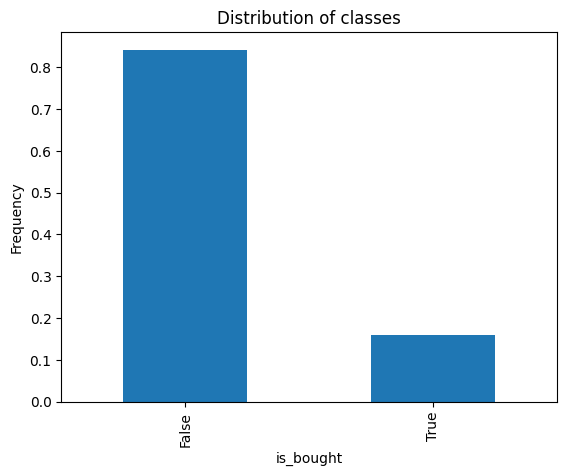

In [62]:
print(df.groupby('is_bought').size())
print(len(df))

(df.groupby('is_bought').size()/len(df) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

In [63]:
data_orig = df.copy()
data = df[['is_bought', 'likes','name', 'artist', 'year', 'gender']]
categorical_columns  = ['name', 'artist', 'year', 'gender']
for c in categorical_columns:
    data[c] = data[c].astype('category')
    
data.columns
data.dtypes

is_bought        bool
likes         float64
name         category
artist       category
year         category
gender       category
dtype: object

In [64]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) # Enter your code here
data_dummies = data_dummies.replace({True: 1, False: 0})
not_categorical_columns  = ['is_bought','likes']
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

In [65]:
data.shape

(120, 183)

In [66]:
data.columns

Index(['is_bought', 'likes', 'name_A Hard Day's Night', 'name_A Kind of Magic',
       'name_A Night at the Opera', 'name_ABBA', 'name_Abbey Road',
       'name_Absolution', 'name_Aladdin Sane', 'name_Arrival',
       ...
       'year_2016', 'year_2017', 'year_2018', 'year_2021', 'year_2022',
       'gender_Electronic', 'gender_Flamenco', 'gender_Pop', 'gender_Pop Rock',
       'gender_Rock'],
      dtype='object', length=183)

In [72]:
data.rename(columns = {'is_bought':'target'}, inplace=True )

In [74]:
X = np.array(data['likes']).reshape(-1, 1)
Y = np.array(data['target']).reshape(-1, 1)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [78]:
linear = linear_model.LinearRegression()
linear = linear.fit(x_train, y_train)

z_vals = linear.predict(x_test)

In [ ]:
print("Coefficients: \n", linear.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, z_vals))
print("Coefficient of determination: %.2f" % r2_score(y_test, z_vals))

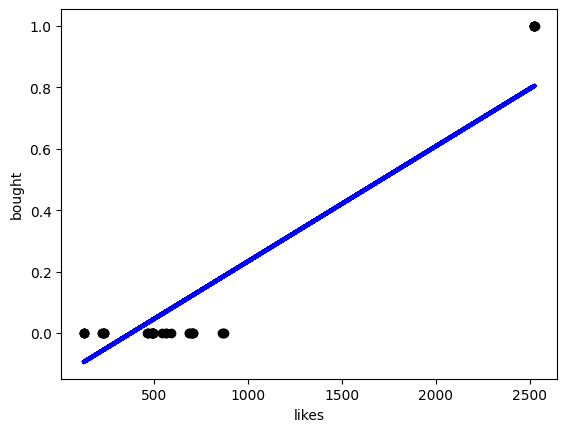

In [80]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, z_vals, color="blue", linewidth=3)

plt.xlabel('likes')
plt.ylabel('bought')

plt.show()